# 7 Linked List

## 7.1 추상적 자료구조 Abstract Data Structures 

### 7.1.1 Data

e.g) 정수, 문자열, 레코드, ...

### 7.1.2 A set of operations

e.g) 삽입, 삭제, 순회, ...

e.g) 정렬, 탐색, ...

## 7.2 단순 연결 리스트 Singly Linked List 

각 노드에는, 

- data
- next

head, tail, # of nodes 등을 구현해서 class로 추상화시키면 그것이 단순 연결 리스트의 추상적 자료구조가 된다. 

In [1]:
class Node:
    def __init__(self, item):
        self.data = item
        self.next = None

In [2]:
class LinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = None
        self.tail = None

연산을 정의해보자. 

1. 특정 원소 참조 (k번째)
2. 리스트 순회
3. 길이 얻어내기 
4. 원소 삽입
5. 원소 삭제
6. 두 리스트 합치기 

여기선 1,2,3만 한다. 

이 때, 첫 노드를 0번째로 하지 않고 1번째로 하고, 0번은 따로 빼놓을 것이다. 

In [3]:
class LinkedList:
    def __init__(self):
        self.nodeCount = 0
        self.head = None
        self.tail = None
        
    def getAt(self, pos):
        if pos <= 0 or pos > self.nodeCount:
            raise Exception('Invalid position')
        
        i = 1
        current = self.head
        while i < pos:
            current = current.next
            i += 1
        
        return current
    
    def traverse(self): 
        ans = []
        
        cursor = self.head
        if cursor is None:
            return ans
        
        while cursor.next is not None:
            ans.append(cursor.data)
            cursor = cursor.next
        else:
            ans.append(cursor.data)
            
        return ans

이와 같이 linked list를 구현할 때 `traverse()` 하는 것이 단순히 `getAt()`을 반복하는 것이 되어선 안된다. 

`getAt()`은 한 단계식 다 거쳐 해당 인덱스를 찾는 것이기 때문에 그냥 단순히 이를 리스트에 `append` 하여 답을 구한다면 그건 사실상 한 번씩만 방문하는 traverse가 아니기 때문이다. 

따라서 위와 같이 구현해야 한다. 이 때 return 값으로 node가 아니고 node의 data가 들어가야 했었다는 점을 주의하자. 어이없게 케이스를 통과 못했었다. 

배열과 연결리스트의 차이는 무엇인가?

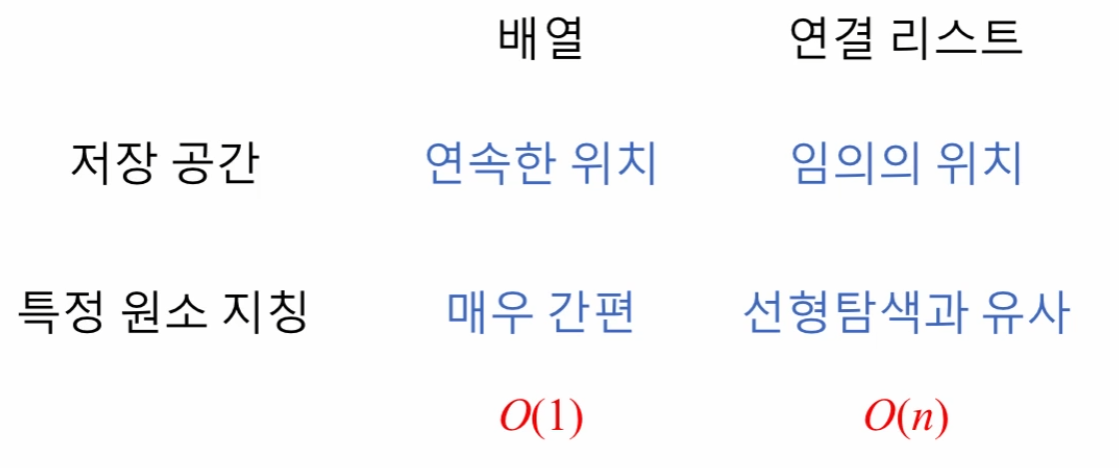

